<a href="https://colab.research.google.com/github/UlasDeveci/UlasDeveci/blob/main/RLC_proje_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RLC circuits
## Introduction

The study of RLC circuits is fundamental in electrical engineering and physics due to their widespread applications in various electronic devices and systems. An RLC circuit comprises a resistor (R), an inductor (L), and a capacitor (C) connected in series or parallel, driven by an alternating current (AC) source. These circuits exhibit unique resonance behavior at a specific frequency, where the inductive and capacitive reactances cancel each other out, resulting in maximum current flow.

Understanding the behavior of RLC circuits under different conditions is crucial for designing efficient electronic systems. By analyzing the differential equations governing these circuits, we can gain insights into their dynamic response, resonance effects, and energy distribution. This project aims to solve the differential equations of an RLC circuit with an AC source, explore the impact of varying frequencies, and compare theoretical and numerical solutions to highlight the circuit's resonance characteristics and frequency response.

This project will involve:
1. Formulating the governing differential equation.
2. Solving the differential equation analytically and numerically.
3. Analyzing the circuit's behavior at resonance and other frequencies.
4. Comparing theoretical predictions with numerical results.

These analyses will provide a comprehensive understanding of RLC circuits and their practical applications in electronic and communication systems.

## Steps:
1. Determine the equation of motion of the RLC circuit.
2. Choose an appropriate method to solve the differential equation numerically
   (for example, the Runge-Kutta method).
3. Calculate current and voltage values.
4. Analyze resonance effects.   


# RLC Circuit and AC Source


An RLC circuit consists of a resistor (R), an inductor (L), and a capacitor (C). These circuits exhibit resonance behavior when driven by a sinusoidal AC source. Resonance occurs at a specific frequency where the circuit responds with maximum energy transfer.

## Equation of Motion
The equation of motion for an RLC circuit is derived using Kirchhoff's voltage law, which states that the total voltage in the circuit must be zero:

$ V(t) = V_L + V_R + V_C $

Where:
- $ V(t) $ is the voltage of the AC source.
- $ V_L = L \frac{dI}{dt} $ is the voltage across the inductor.
- $ V_R = IR $ is the voltage across the resistor.
- $ V_C = \frac{Q}{C} $ is the voltage across the capacitor.

Using this equation, we derive the following second-order differential equation:

$ L\frac{d^2Q}{dt^2} + R\frac{dQ}{dt} + \frac{Q}{C} = V_0 \cos(\omega t) $

Let's solve this differential equation step by step.

In [15]:
import math
import matplotlib.pyplot as mpl_p

# Parametre setleri
parameter_sets = [
    {'L': 2.0, 'R': 5.0, 'C': 0.5, 'V0': 1.0, 'omega': 1.0},
    {'L': 4.0, 'R': 10.0 , 'C': 0.25, 'V0': 2.0, 'omega': 1.25},
    {'L': 6.0, 'R': 15.0, 'C': 0.17, 'V0': 3.0, 'omega': 1.50},
]
Vm = 5    # Maksimum kaynak gerilimi
final_time = 20.0   # Son zaman

# Diff Denklem
def rlc(t, Q, I):
    dQdt = I
    dIdt = (V0 * math.cos(omega * t) - Q / C - R * I) / L
    return dQdt, dIdt


Q0 = 0.0
I0 = 0.0

## Solving the Differential Equation
Using the relationship between charge (Q) and current (I):

$ I = \frac{dQ}{dt} $

We can rewrite the equation of motion:

$ L\frac{d^2Q}{dt^2} + R\frac{dQ}{dt} + \frac{Q}{C} = V_0 \cos(\omega t) $

To solve this equation, we define the initial conditions:

- $ Q(0) = 0 $
- $ I(0) = 0 $

The general solution of the differential equation consists of the homogeneous solution and the particular solution.

### Homogeneous Solution
For the homogeneous equation, we set the source voltage to zero:

$ L\frac{d^2Q}{dt^2} + R\frac{dQ}{dt} + \frac{Q}{C} = 0 $

The characteristic equation is:

$ Lr^2 + Rr + \frac{1}{C} = 0 $

Solving this quadratic equation for $ r $:

$ r = \frac{-R \pm \sqrt{R^2 - 4L/C}}{2L} $

### Particular Solution
The particular solution accounts for the source voltage. We consider:

$ Q_p(t) = A \cos(\omega t) + B \sin(\omega t) $

We substitute this into the equation of motion and solve for the constants $ A $and $ B $.

### General Solution
The general solution is the sum of the homogeneous and particular solutions:

$ Q(t) = Q_h(t) + Q_p(t) $

This represents the charge as a function of time in the circuit.


In [21]:
# Zaman Hesabı
t_start = 0
t_end = 50
num_points = 1000
dt = (t_end - t_start) / num_points


t_values = [t_start + i * dt for i in range(num_points + 1)]

def rlc(t, Q, I, params):
    V0, omega, L, R, C = params['V0'], params['omega'], params['L'], params['R'], params['C']
    dQdt = I
    dIdt = (V0 * math.cos(omega * t) - Q / C - R * I) / L
    return dQdt, dIdt

# Euler
Q_values = [Q0]
I_values = [I0]


for t in t_values[:-1]:
    dQdt, dIdt = rlc(t, Q_values[-1], I_values[-1], params)
    Q_values.append(Q_values[-1] + dQdt * dt)
    I_values.append(I_values[-1] + dIdt * dt)

# Voltaj Hesabı
C, R, L = params['C'], params['R'], params['L']
V_C_values = [Q / C for Q in Q_values]
V_R_values = [R * I for I in I_values]
V_L_values = [(L * (I_values[i+1] - I_values[i]) / dt) for i in range(len(I_values) - 1)]
V_L_values.append(V_L_values[-1])

# Faz kayması
V0, omega = params['V0'], params['omega']

V_R_rescaled = [V0 * math.cos(omega * t) for t in t_values]  # Direnç voltajı ile aynı fazda
V_L_phase_shifted = [V0 * math.sin(omega * t) for t in t_values]  # 90 derece önde
V_C_phase_shifted = [-V0 * math.sin(omega * t) for t in t_values]  # 90 derece geride


### Current and Voltage
To find the current, we take the derivative of the charge:

$ I(t) = \frac{dQ(t)}{dt} $

The voltage in the circuit is given by:

$ V(t) = V_0 \cos(\omega t) $

## Resonance Frequency
The resonance frequency in an RLC circuit depends on the inductance and capacitance values and is calculated as follows:

$ f_r = \frac{1}{2\pi \sqrt{LC}} $

At the resonance frequency, the circuit exhibits maximum current and minimum impedance.

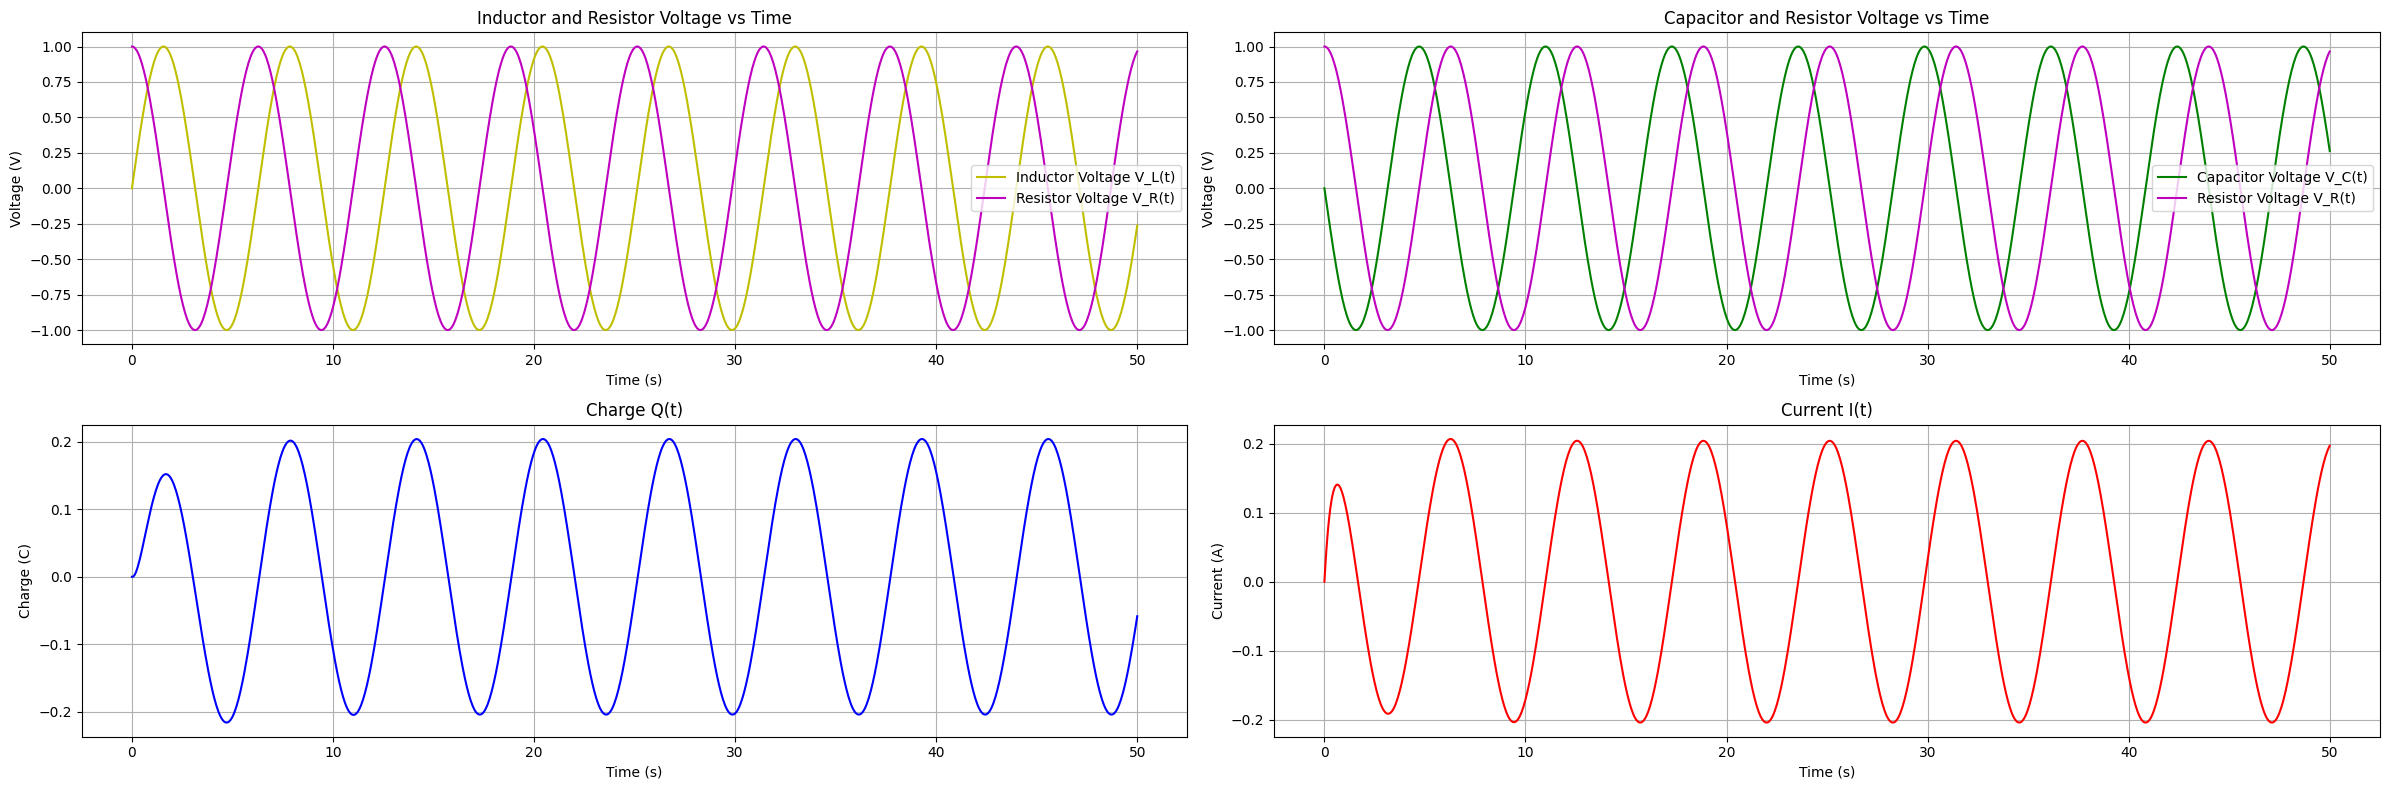

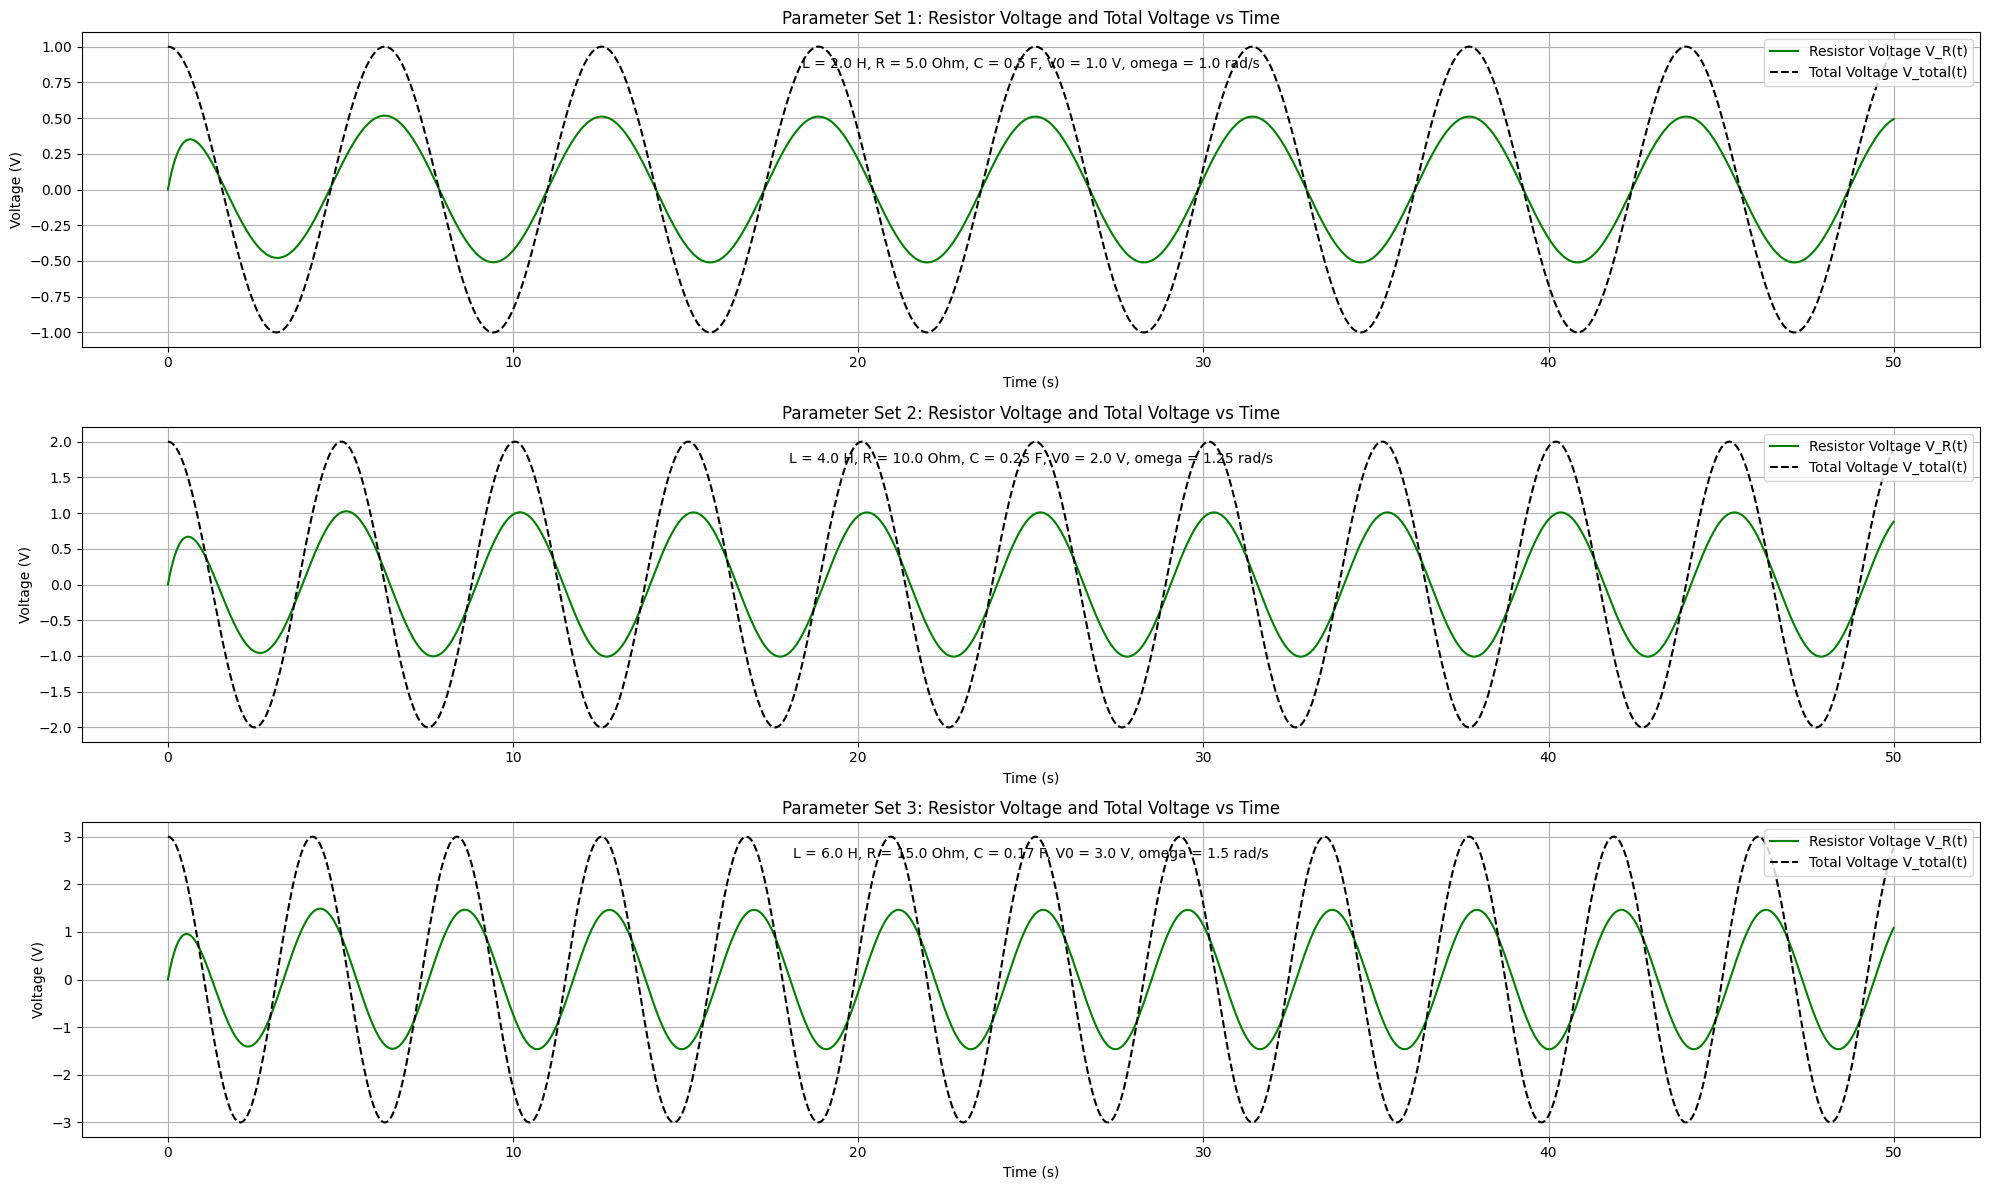

In [22]:
mpl_p.figure(figsize=(24, 8))

# İndüktör ve Direnç Voltajı
mpl_p.subplot(2, 2, 1)
mpl_p.plot(t_values, V_L_phase_shifted, label='Inductor Voltage V_L(t)', color='y')
mpl_p.plot(t_values, V_R_rescaled, label='Resistor Voltage V_R(t)', color='m')
mpl_p.title('Inductor and Resistor Voltage vs Time')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Voltage (V)')
mpl_p.legend()
mpl_p.grid(True)

# Kondansatör ve Direnç Voltajı
mpl_p.subplot(2, 2, 2)
mpl_p.plot(t_values, V_C_phase_shifted, label='Capacitor Voltage V_C(t)', color='g')
mpl_p.plot(t_values, V_R_rescaled, label='Resistor Voltage V_R(t)', color='m')
mpl_p.title('Capacitor and Resistor Voltage vs Time')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Voltage (V)')
mpl_p.legend()
mpl_p.grid(True)

# Q(t) grafiği
mpl_p.subplot(2, 2, 3)
mpl_p.plot(t_values, Q_values, label='Charge Q(t)', color='b')
mpl_p.title('Charge Q(t)')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Charge (C)')
mpl_p.grid(True)

# I(t) grafiği
mpl_p.subplot(2, 2, 4)
mpl_p.plot(t_values, I_values, label='Current I(t)', color='r')
mpl_p.title('Current I(t)')
mpl_p.xlabel('Time (s)')
mpl_p.ylabel('Current (A)')
mpl_p.grid(True)

mpl_p.tight_layout()
mpl_p.show()


# omega değiştiğinde oluşan Grafik
mpl_p.figure(figsize=(20, 12))

for i, params in enumerate(parameter_sets, start=1):
    # Başlangıç koşulları
    Q0, I0 = 0.0, 0.0
    Q_values = [Q0]
    I_values = [I0]

    for t in t_values[:-1]:
        dQdt, dIdt = rlc(t, Q_values[-1], I_values[-1], params)
        Q_values.append(Q_values[-1] + dQdt * dt)
        I_values.append(I_values[-1] + dIdt * dt)

    # Voltajların hesaplanması
    V_R_values = [0.5 * params['R'] * I for I in I_values]  # Genliği düşürmek için çarpan ekledik
    V_total_values = [params['V0'] * math.cos(params['omega'] * t) for t in t_values]  # Kaynak voltajı

    # Grafik
    mpl_p.subplot(3, 1, i)
    mpl_p.plot(t_values, V_R_values, label=f'Resistor Voltage V_R(t)', color='g')
    mpl_p.plot(t_values, V_total_values, label=f'Total Voltage V_total(t)', color='k', linestyle='--')
    mpl_p.title(f'Parameter Set {i}: Resistor Voltage and Total Voltage vs Time')
    mpl_p.xlabel('Time (s)')
    mpl_p.ylabel('Voltage (V)')
    mpl_p.legend()
    mpl_p.grid(True)

    # Parametre değerlerini grafik üzerine yazdırma
    param_text = f"L = {params['L']} H, R = {params['R']} Ohm, C = {params['C']} F, V0 = {params['V0']} V, omega = {params['omega']} rad/s"
    mpl_p.text(0.5, 0.9, param_text, ha='center', va='center', transform=mpl_p.gca().transAxes)

mpl_p.tight_layout()
mpl_p.show()


## Conclusion
In this project, we analyzed the behavior of an RLC circuit driven by an AC source. Through theoretical and numerical methods, we derived and solved the second-order differential equation governing the circuit. By examining the current and voltage responses, we observed resonance behavior, where the circuit exhibited maximum current at the resonance frequency. The results demonstrated how varying the frequency impacts the circuit's performance, with the resonance frequency providing the optimal condition for energy transfer. This analysis enhances our understanding of RLC circuits and their practical applications in electronic and communication systems.
